# C3M5 Lesson 2 Practice Lab: Flight delays and cancellations - Working with time series data

In this lesson, you will continue working with Flight delays and cancellations dataset. Now you will look at some time series data and explore how the different variables change over time.

You will be working with the following columns:

- `Airline`: Name of the operating airline. If the value is “All Airlines”, the data given represents aggregated values.
- `Month`: Month of the flight in Month-Year format
- `Sectors_Scheduled`: How many flights were scheduled for the given airline and route for the given month
- `Cancellations`: Number of cancellations
- `Arrivals_Delayed`: Number of flights that arrived at the gate 15 minutes after the scheduled arrival time shown in the carriers' schedule. 


## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of contents
- [Step 1: Import libraries](#import-libraries)
- [Step 2: Load the data](#load-the-data)
- [Step 3: Process the dataset](#process-the-dataset)
- [Step 4: Smoothing the time series](#smoothing-the-time-series)
- [Step 5: Speed of changes](#speed-of-changes)


<a id="import-libraries"></a>

## Step 1: Import libraries
Begin by importing the pandas library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id="load-the-data"></a>

## Step 2: Load the data
Begin by loading the data. Run the cell below to load the data.

In [2]:
df = pd.read_csv("otp_time_series_web.csv")
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155,0.0,123.0,120.0,32.0,35.0,2004,1
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75,0.0,72.0,72.0,3.0,3.0,2004,1
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40,0.0,36.0,35.0,4.0,5.0,2004,1
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548,2.0,478.0,487.0,70.0,61.0,2004,1
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191,0.0,169.0,168.0,22.0,23.0,2004,1


<a id="process-the-dataset"></a>

## Step 3: Process the dataset
Now run the cell below to process the dataset. You have done all these steps already in the previous lesson. 

<Axes: xlabel='Month'>

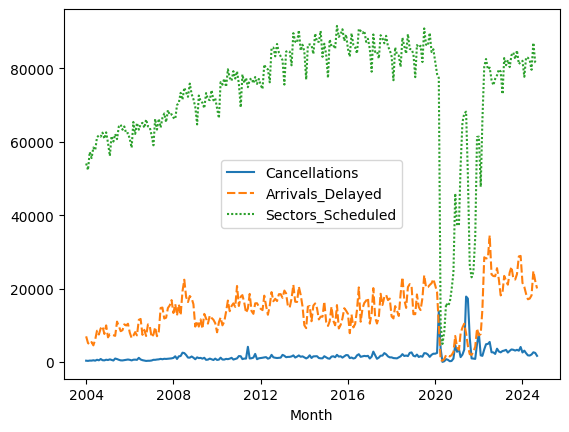

In [3]:
# convert the "Month column to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y")

# Filter the data
df_all_airlines = df[df["Airline"]=="All Airlines"]

# Create a new dataframe with the sum of the columns grouped by month
df_per_month = df_all_airlines.groupby("Month")[[
    "Cancellations", "Arrivals_Delayed", "Sectors_Scheduled"]].sum()

# plot the time series
sns.lineplot(df_per_month)

It seems like there is an overall increasing pattern in the three curves with a 3 year period where the scheduled flights plummet, as you have already seen in the previous lesson.
If you look closely, you can also see a small drop on the number of scheduled flights during the first months of each year.

<a id="smoothing-the-time-series"></a>

## Step 4: Smoothing the time series

The delayed arrivals curve looks a bit noisy. To get a clearer picture of the trends without getting distracted by sudden spikes or drops, you will find the moving average to help smooth the data. This way, you can focus on the bigger patterns in delays and cancellations, making it easier to give better booking advice.    


<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the following cell to find the moving average of the "Arrivals_Delayed" column. You want to smooth the data over a whole year (12 months) </li>
            <ul>
                <li>You should use the <code>rolling()</code> method along with the mean to aggregate the data inside each window
            </ul>
            <li>Plot the original data using `sns.lineplot()` with `df_per_month["Arrivals_Delayed"]` as an argument.</li>
            <li>Plot the moving average using `sns.lineplot()` with `delays_moving_average` as an argument.</li>
        </ol>
</div>

<Axes: xlabel='Month', ylabel='Arrivals_Delayed'>

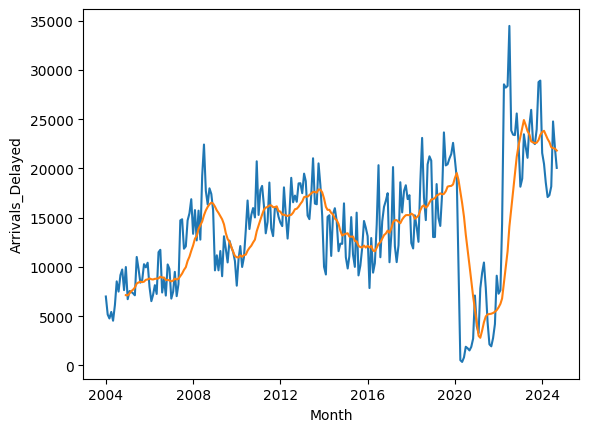

In [4]:
# find the moving average for a window of length 12
delays_moving_average = df_per_month["Arrivals_Delayed"].rolling(window=12).mean() 

# Plot the original data
sns.lineplot(df_per_month["Arrivals_Delayed"])

# plot the moving average
sns.lineplot(delays_moving_average)

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL2/ma.png" width="400">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# find the moving average for a window of length 12
delays_moving_average = df_per_month["Arrivals_Delayed"].rolling(window=12).mean() 

# Plot the original data
sns.lineplot(df_per_month["Arrivals_Delayed"])

# plot the moving average
sns.lineplot(delays_moving_average)
```
</details>

<a id="speed-of-changes"></a>

## Step 5: Speed of changes

To understand how quickly delays or cancellations are changing over time, calculating the percent change helps highlight the most significant shifts. 
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to find the percent change in the "Arrivals_Delayed" column. </li>
            <ul>
                <li> You can use the <code>pct_change()</code> method.</li>
            </ul>
            <li>Plot the percent change curve to visualize it.</li>
            <li>Add a horizontal line at y=0 for clarity (already implemented).</li>
        </ol>
</div>

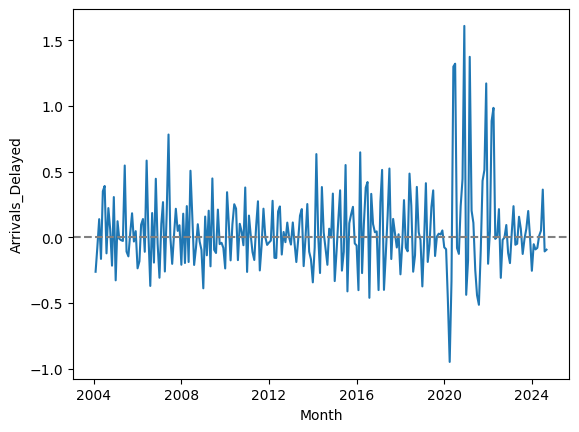

In [5]:
# find the percent change for the "Arrivals_Delayed" column
cancel_pct_change = df_per_month["Arrivals_Delayed"].pct_change()

# plot the result
sns.lineplot(cancel_pct_change)

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--', label="y=0")

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL2/pct_chg.png" width="400">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# find the percent change for the "Arrivals_Delayed" column
cancel_pct_change = df_per_month["Arrivals_Delayed"].pct_change()

# plot the result
sns.lineplot(cancel_pct_change)

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--', label="y=0")
```
</details>

The pandemic years, during 2020-2022, are a real mess, but also not very informative to analyze regular behavior. Filter out those points and plot the percent change again.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Filter all the rows before March 2020</li>
            <li>Plot the percent change once again</li>
            <li>Add a horizontal line at y=0 for clarity (already implemented).</li>
        </ol>
</div>

In [6]:
# filter the series
cancel_pct_change_filtered = cancel_pct_change["Month"] < "2020-03-01"

# plot the result
sns.lineplot(cancel_pct_change_filtered)

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--', label="y=0")

KeyError: 'Month'

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL2/pct_chg_filtered.png" width="400">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# filter the series
cancel_pct_change_filtered = cancel_pct_change[:"2020-03-01"]

# plot the result
sns.lineplot(cancel_pct_change)

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--', label="y=0")
```
</details>

This change rates are still huge, can you identify changes above 50%?
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li> In the next cell, find the rows in <code>otp_per_month</code> where the percent change is greater than 50%  </li>
        </ol>
</div> 

In [ ]:
# filter the values in otp_per_month with a percent change greater than 50
df_per_month[None]

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL2/pct50.png" width="250">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# filter the values in otp_per_month with a percent change greater than 50
df_per_month[cancel_pct_change>50]
```
</details>

Notice that almost half of the values happened during the two-year period of the pandemic.

Congratulations for making it until the end of this lab. You will keep working on this dataset in Lesson 3. Hope you enjoyed it! 